# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Cargar-la-intensidad-con-P1-y-P4" data-toc-modified-id="Cargar-la-intensidad-con-P1-y-P4-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar la intensidad con P1 y P4</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calibration parameters</a></div><div class="lev1 toc-item"><a href="#Otros-ajustes" data-toc-modified-id="Otros-ajustes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Otros ajustes</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---1:-sencillo" data-toc-modified-id="Fitting-to-matrices---1:-sencillo-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting to matrices - 1: sencillo</a></div><div class="lev2 toc-item"><a href="#Ajuste-global:-p0,-p1,-angulo" data-toc-modified-id="Ajuste-global:-p0,-p1,-angulo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ajuste global: p0, p1, angulo</a></div><div class="lev3 toc-item"><a href="#Verificación" data-toc-modified-id="Verificación-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Verificación</a></div><div class="lev3 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparación</a></div><div class="lev3 toc-item"><a href="#Conclusión" data-toc-modified-id="Conclusión-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Conclusión</a></div>

# Determinación de los parámetros del divisor de haz usando dos polarizadores

**Autor**: Jesús del Hoyo

**Fecha**:   24/08/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 4 LPNIRE100-B (P2), solo en Experimento 2.

We assume that the polarizers may depolarize, with their Mueller matrix as:

\begin{equation}
M_{pol}(\theta=0)=M_{depol}*M_{diat}(\theta=0)=
\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & d & 0 & 0 \\
0 & 0 & d & 0 \\
0 & 0 & 0 & d \\
\end{array}\right] *
\left[\begin{array}{cccc}
P^2_1+P^2_2 & P^2_1-P^2 & 0 & 0 \\
P^2_1-P^2 & P^2_1+P^2_2 & 0 & 0 \\
0 & 0 & 2P_1P_2 & 0 \\
0 & 0 & 0 & 2P_1P_2 \\
\end{array}\right]
\end{equation}

**4th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, P1 and P2 rotation.
1. 2D, R1 and P2 rotation.

Parameters that can be extracted from fit:
1. Theta 0 of R1.
1. R parameters (moddeled as diattenuator retarder).

**5th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, R1 and R2 rotation, both polarizers horizontal.
1. 2D, R1 and R2 rotation, first polarizer horizontal, second polarizer vertical.

Parameters that can be extracted from fit:
1. Theta 0 of R2.
1. Fine tuning of R parameters (moddeled as diattenuator retarder).


In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from __future__ import print_function

import time
import pprint

from numpy import array, matrix, matmul, power, sum, size, zeros
from math import sin, cos, pi, sqrt
from cmath import exp

from phyton_optics import degrees , sp, plt

from scipy import optimize, exp
from scipy.io import loadmat

from polarimeter.utils import plot_experiment_residuals_1D
from polarimeter.polarimeter import (get_polarimeter_parameters, intensity, 
                                    polarimeter_matrices, get_light_parameters)

from phyton_optics.polarization_jones import rotation
from phyton_optics.polarization_stokes import polarizer_linear, rotate_mueller, polarized_light
from polarimeter.utils import dibujar_2d_fitting


from polarimeter.polarimeter import Intensity_Rotating_Elements
import polarimeter.polarimeter as opsys
import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import numpy as np
import scipy as sp
import os

## Load data

In [23]:
# Go to the desired folder
#dir = 'calibration'
print(os.getcwd())
#os.chdir(dir)

# Load file, Experiment 4
filename = 'Experimento_4_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e4x = data['angle2x']*degrees
angle_e4y = data['angle2y']*degrees
Imax_e4 = data['intensity_max']
I_e4 = data['intensity2']
Imax = data['intensity_max']

# Load file, Experiment 5a
filename = 'Experimento_5a_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e5ax = data['angle2x']*degrees
angle_e5ay = data['angle2y']*degrees
Imax_e5a = data['intensity_max']
I_e5a = data['intensity2']
# Load file, Experiment 5b
filename = 'Experimento_5b_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e5bx = data['angle2x']*degrees
angle_e5by = data['angle2y']*degrees
Imax_e5b = data['intensity_max']
I_e5b = data['intensity2']

D:\codigo\polarimeter\notebooks\calibration


In [24]:
def depolarizer_diattenuator(p1, p2, d=1, theta=0):
    # Calculate maximum and minimum intensity to use the simple formulas
    IM = (p1**4 + p2**4)/2 
    Im = (p1**2) * (p2**2)
    # Now, calculate the new p1 and p2 as function of d
    p1 = ((IM*(d+1) + Im*(d-1) + 2*sqrt((IM**2 - Im**2)/d))/(2*d))**0.25
    p2 = ((IM*(d+1) + Im*(d-1) - 2*sqrt((IM**2 - Im**2)/d))/(2*d))**0.25
    print(p2)
    # Check that the d value is correct
    if np.isnan(p2):
        raise ValueError('Depolarization parameter inserted is too high.')
    # Create the Stokes matrices of the diattenuator and de depolarizer, and multiply them
    M1 = ps.polarizer_linear(p1, p2)
    M2 = ps.depolarizer(d)
    M = M2*M1
    # Rotate the matrix if necessary
    if theta != 0:
        M = ps.rotate_mueller(M, theta)
    # Output
    return M

def Mueller_Retarder(p1, p2, delta):
    suma = p1**2 + p2**2
    dif = p1**2 - p2**2
    mult = 2*p1*p2
    cd = cos(delta)
    sd = sin(delta)
    M = 0.5 * matrix(array([[suma, dif, 0, 0],
                     [dif, suma, 0, 0],
                     [0, 0, mult*cd, mult*sd],
                     [0, 0, -mult*sd, mult*cd]]))
    return M

## Experiment 4: Rotating both pols

This experiment is done to measure the parameters of the diattenuator retarder. Also, this is the trial by fire, as the model uses to fail here.

First, calculate the exact parameters for P1 depending on despolarization. It will be done only for P1, as the depolarization produced by E2 has no effect.

C:\Users\Jesus\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


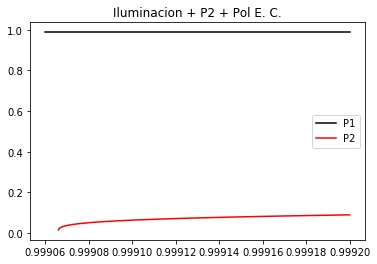

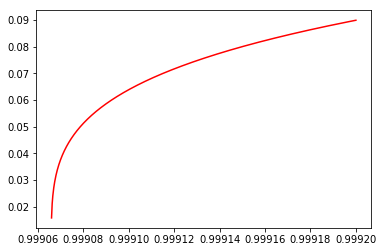

In [25]:
# Measured parameters (supposing d=1)
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
IM = (p11**4 + p12**4)/2 
Im = (p11**2) * (p12**2)

# Plot the different values of P2
nd = 1000
darray = np.linspace(0.99906,0.9992,nd)
p1 = zeros(nd)
p2 = zeros(nd)
for ind, d in enumerate(darray):
    # Now, calculate the new p1 and p2 as function of d
    p1[ind] = ((IM*(d+1) + Im*(d-1) + 2*sqrt((IM**2 - Im**2)/d))/(2*d))**0.25
    p2[ind] = ((IM*(d+1) + Im*(d-1) - 2*sqrt((IM**2 - Im**2)/d))/(2*d))**0.25

#Plot
plt.figure()
plt.plot(darray, p1,'k', label='P1')
plt.hold = True
plt.title('Iluminacion + P2 + Pol E. C.')
plt.plot(darray, p2,'r', label='P2')
plt.legend()

plt.figure()
plt.plot(darray, p2,'r', label='P2')        

# d = 0.99907

Use it to fit R1.

0.0375986345682
Fit parameters for the quarter waveplate: A = 1.01848099548; B = 1.02249825512; delta = 85.1548908279º; Th0 = 141.409163539º;


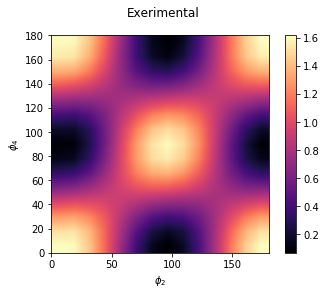

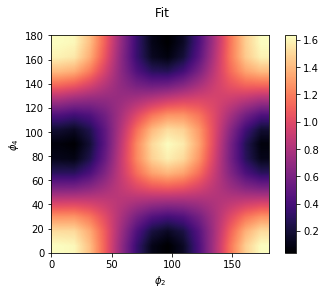

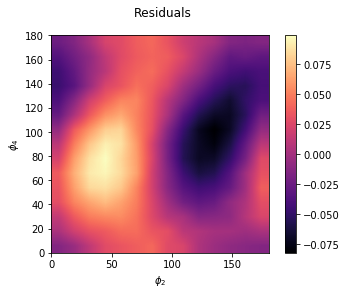

In [26]:
# Initial parameters
d = 0.99907
#d = 0.9990659
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [.95, 0.95, 90*degrees, 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]
    I = Intensity_Rotating_Elements(J, th, Imax/2)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, I_e4))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180 ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y)
residuals = I_e4 - I_fitting
dibujar_2d_fitting(angle_e4x, angle_e4y, I_e4, title='Exerimental')
dibujar_2d_fitting(angle_e4x, angle_e4y, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')

And with the R2 experiment

0.0458917140334
Fit parameters for the quarter waveplate: Th0 = 16.305711721º; I0 = 0.939988942293º; Th01 = 39.8487826531º;


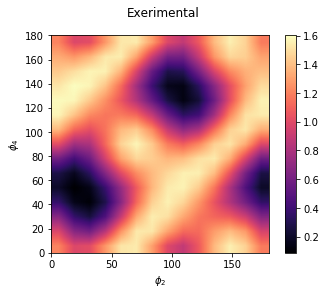

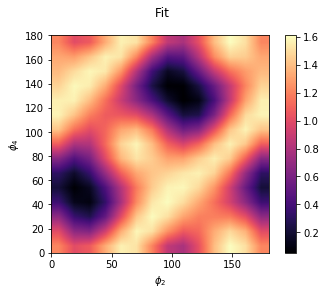

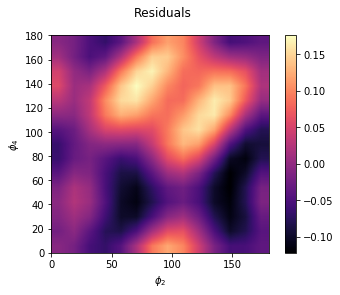

In [11]:
# Initial parameters
#d = 0.9990659
# Initial parameters
d = 0.999075
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 138.627970066*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR = [1.01776671258, 1.02172527164, 85.1080062319*degrees]
#E0 = 1.38512099075
#par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
par0 = [0, 1, 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2):     
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(parR[0], parR[1], parR[2])
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th1-par[2], -th0[2], th2-par[0], -th0[3]]
    I = Intensity_Rotating_Elements(J, th, Imax/2)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I*par[1]
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: Th0 = {}º; I0 = {}º; Th01 = {}º;'.format(
        (par1[0]/degrees)%180, par1[1], (par1[2]/degrees)%180 ))
#print((par1[4]/degrees)%180)
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

## Opposite order: Fit experiment 5 and then use the data for experiment 4

We have to suppose that the depolarization produced by the first retardes is negligible.

0.00263347742243
Fit parameters for the quarter waveplate: A = 1.00029295813; B = 0.999641056847; delta = 81.0248970205º; Th0r1 = 39.921631594º; Th0r2 = 16.2577370605º;


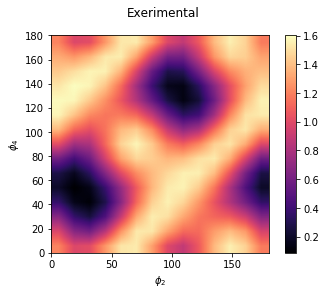

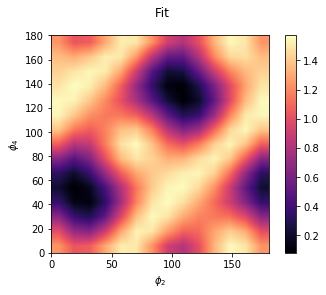

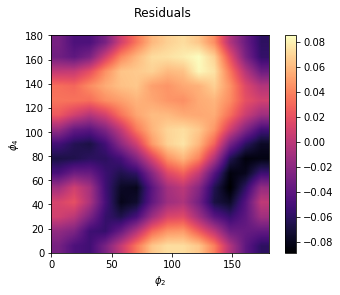

In [12]:
# Initial parameters
d = 0.9990659
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR = [1.01776671258, 1.02172527164, 85.1080062319*degrees]
#E0 = 1.38512099075
#par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
par0 = [0.95, 0.95, 90*degrees, 0, 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2):     
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th1-par[3], -th0[1], th2-par[4], -th0[2]]
    I = Intensity_Rotating_Elements(J, th, Imax/2)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0r1 = {}º; Th0r2 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180, (par1[4]/degrees)%180 ))
#print((par1[4]/degrees)%180)
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

Comprobaciones.

0.00263347742243
Fit parameters for the quarter waveplate: Th0 = 16.2861432708º; I0 = 1.05000858862º; Th01 = 39.9832838435º;


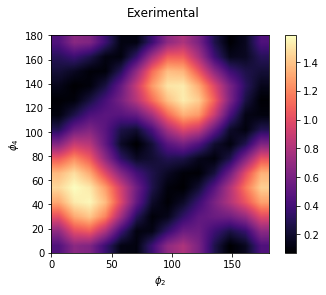

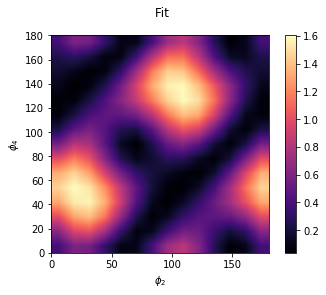

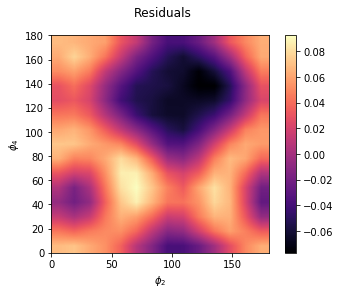

In [13]:
# Initial parameters
d = 0.9990659
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 138.627970066*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR = [1.0001648537, 0.999511976937, 80.9857340801*degrees]
#E0 = 1.38512099075
#par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
par0 = [0, 1, 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2):     
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(parR[0], parR[1], parR[2])
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th1-par[2], -th0[2], th2-par[0], -th0[3]-90*degrees]
    I = Intensity_Rotating_Elements(J, th, Imax/2)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I*par[1]
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5bx, angle_e5by, I_e5b))
# Print results
print('Fit parameters for the quarter waveplate: Th0 = {}º; I0 = {}º; Th01 = {}º;'.format(
        (par1[0]/degrees)%180, par1[1], (par1[2]/degrees)%180 ))
#print((par1[4]/degrees)%180)
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5bx, angle_e5by)
residuals = I_e5b - I_fitting
dibujar_2d_fitting(angle_e5bx, angle_e5by, I_e5b, title='Exerimental')
dibujar_2d_fitting(angle_e5bx, angle_e5by, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5bx, angle_e5by, residuals, title='Residuals')

0.00263347742243
Fit parameters for the quarter waveplate: Th0 = 141.28275646º; I0 = 1.02740924253;


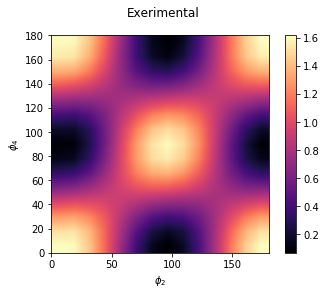

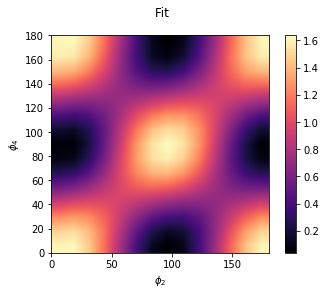

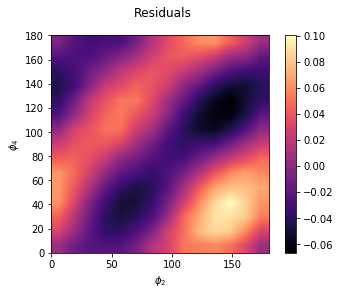

In [14]:
# Initial parameters
d = 0.9990659
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
parR = [1.0001648537, 0.999511976937, 80.9857340801*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [0, 1]
# Define calculating and distance functions
def model_func2D(par, th1, th2):
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(parR[0], parR[1], parR[2])
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[0], -th0[1], th2-th0[2]]
    #I = Intensity_Rotating_Elements(J, th, Imax/2)
    I = Intensity_Rotating_Elements(J, th, E0)
    return I*par[1]
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, I_e4))
# Print results
print('Fit parameters for the quarter waveplate: Th0 = {}º; I0 = {};'.format(
        (par1[0]/degrees)%180, par1[1] ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y)
residuals = I_e4 - I_fitting
dibujar_2d_fitting(angle_e4x, angle_e4y, I_e4, title='Exerimental')
dibujar_2d_fitting(angle_e4x, angle_e4y, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')

## Use all the data to fit

Here I use all the data available to fit the retarders.

0.00263347742243
Fit parameters for the quarter waveplate: A = 1.01200444242; B = 1.01559928809; delta = 83.7121599804º;
Fit parameters for the angles: Th0r1 = 141.269105946º; Th0r2 = 39.9347986646º Th0r3 = 16.277917855º;
Fit parameters for Intensity factors: f2 = 0.943835494233; f3 = 0.951297666573;


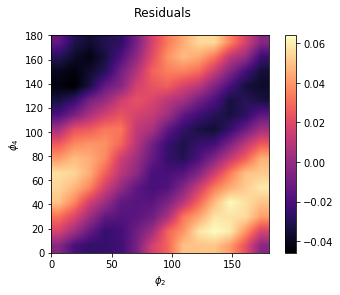

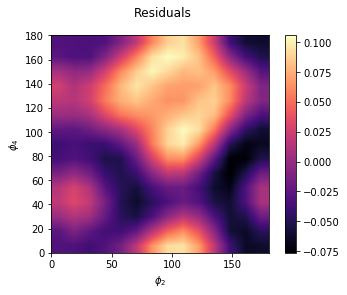

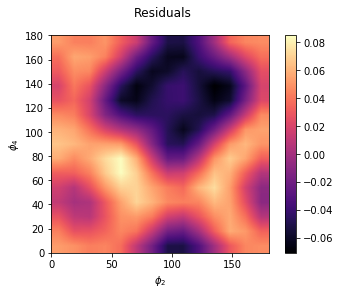

In [15]:
# Initial parameters
d = 0.9990659
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [0.95, 0.95, 90*degrees, 0, 0, 0, 1, 1]

# Define calculating and distance functions
def model_func2D(par, th1, th2, th3, th4, th5, th6):
    # Experiment 4
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]    
    I1 = Intensity_Rotating_Elements(J, th, E0)
    # Experiment 5a
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th3-par[4], -th0[1], th4-par[5], -th0[2]]  
    I2 = Intensity_Rotating_Elements(J, th, E0) * par[6]
    # Experiment 5b
    th = [-th0[0], th5-par[4], -th0[1], th6-par[5], -th0[2]-90*degrees]  
    I3 = Intensity_Rotating_Elements(J, th, E0) * par[7]    
    return [I1, I2, I3]

def err_func2D(par, th1, th2, th3, th4, th5, th6, y): 
    I = model_func2D(par, th1, th2, th3, th4, th5, th6)
    dI1 = I[0] - y[0]
    dI2 = I[1] - y[1]
    dI3 = I[2] - y[2]
    return np.concatenate((dI1.flatten(), dI2.flatten(), dI3.flatten()))

# Optimize
y = [I_e4, I_e5a, I_e5b]
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by, y))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the angles: Th0r1 = {}º; Th0r2 = {}º Th0r3 = {}º;'.format(
       (par1[3]/degrees)%180, (par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
print('Fit parameters for Intensity factors: f2 = {}; f3 = {};'.format(
        par1[6], par1[7] ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by)
residuals = I_e4 - I_fitting[0]
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
residuals = I_e5a - I_fitting[1]
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')
residuals = I_e5b - I_fitting[2]
dibujar_2d_fitting(angle_e5bx, angle_e5by, residuals, title='Residuals')

Just for comparison, I will repeat that experiment in Jones using polarizers as diattenuator retarders.

Fit parameters for the quarter waveplate: A = 1.00730676649; B = 1.01143170001; delta = 83.7975280396º;
Fit parameters for the angles: Th0r1 = 145.372073183º; Th0r2 = 32.9909391123º Th0r3 = 14.482380868º;
Fit parameters for Intensity factors: f2 = 0.980860141558; f3 = 0.929946863956;
Fit parameters for the polarizer: Delta = 93.5112719674º;


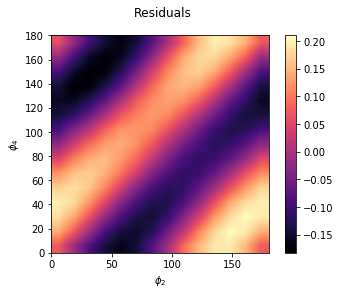

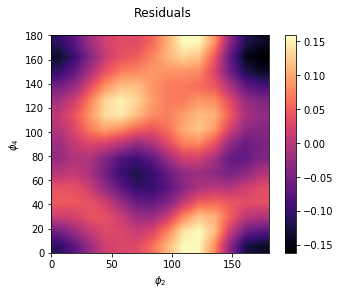

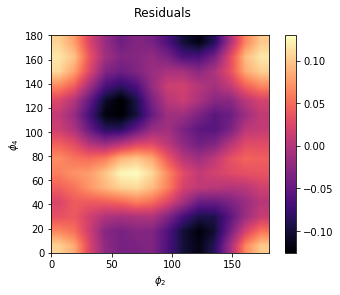

In [16]:
# Initial parameters
d = 0.9990659
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp2 = pj.real_polarizer(p21, p22)
Jbs = pj.real_polarizer(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = pj.elliptical_light(parE[0], parE[1], parE[2], parE[3])
#E0 = 1.38512099075
par0 = [0.95, 0.95, 90*degrees, 0, 0, 0, 1, 1, 0]

# Define calculating and distance functions
def model_func2D(par, th1, th2, th3, th4, th5, th6):
    # Experiment 4
    Jr = pj.diattenuator_retarder(A=par[0], B=par[1], delta=par[2])
    Jp1 = pj.diattenuator_retarder(A=p11, B=p12, delta=par[8])
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]    
    I1 = Intensity_Rotating_Elements(J, th, E0)
    # Experiment 5a
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th3-par[4], -th0[1], th4-par[5], -th0[2]]  
    I2 = Intensity_Rotating_Elements(J, th, E0) * par[6]
    # Experiment 5b
    th = [-th0[0], th5-par[4], -th0[1], th6-par[5], -th0[2]-90*degrees]  
    I3 = Intensity_Rotating_Elements(J, th, E0) * par[7]    
    return [I1, I2, I3]

def err_func2D(par, th1, th2, th3, th4, th5, th6, y): 
    I = model_func2D(par, th1, th2, th3, th4, th5, th6)
    dI1 = I[0] - y[0]
    dI2 = I[1] - y[1]
    dI3 = I[2] - y[2]
    return np.concatenate((dI1.flatten(), dI2.flatten(), dI3.flatten()))

# Optimize
y = [I_e4, I_e5a, I_e5b]
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by, y))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the angles: Th0r1 = {}º; Th0r2 = {}º Th0r3 = {}º;'.format(
       (par1[3]/degrees)%180, (par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
print('Fit parameters for Intensity factors: f2 = {}; f3 = {};'.format(
        par1[6], par1[7] ))
print('Fit parameters for the polarizer: Delta = {}º;'.format(
       (par1[8]/degrees)%180 ))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by)
residuals = I_e4 - I_fitting[0]
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
residuals = I_e5a - I_fitting[1]
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')
residuals = I_e5b - I_fitting[2]
dibujar_2d_fitting(angle_e5bx, angle_e5by, residuals, title='Residuals')

So depolarization is which best fits the experiment. Let's refine it, take two different retarders. As we have experiments with and without R2, it should be able to discriminate.

0.00263347742243
Fit parameters for the first quarter waveplate: A = 1.00987133752; B = 1.01726360574; delta = 84.180802734º;
Fit parameters for the angles: Th0r1 = 141.266377962º; Th0r2 = 39.9318333696º Th0r3 = 16.2866910988º;
Fit parameters for Intensity factors: f2 = 0.987227417442;
Fit parameters for the quarter waveplate: A = 0.992327698929; B = 0.988980250016; delta = 82.6243880849º;


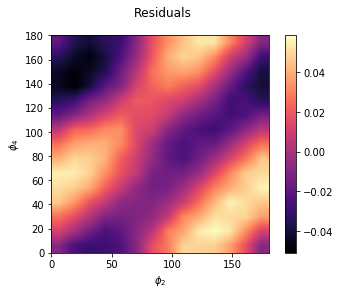

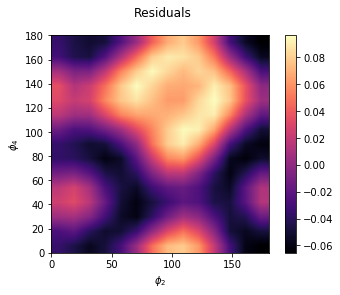

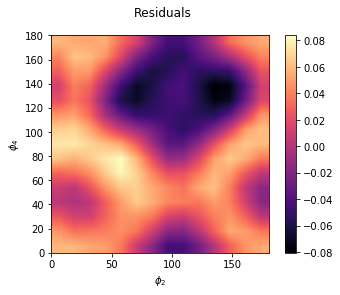

In [17]:
# Initial parameters
d = 0.9990659
#d = 1
(p11, p12, p21, p22) = (0.987890699132, 0.146027198644, 0.978894122499, 0.139589903047)
Jp1 = depolarizer_diattenuator(p11, p12, d)
Jp2 = ps.polarizer_linear(p21, p22)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [0.95, 0.95, 90*degrees, 0, 0, 0, 1, 0.95, 0.95, 90*degrees]

# Define calculating and distance functions
def model_func2D(par, th1, th2, th3, th4, th5, th6):
    # Experiment 4
    Jr1 = Mueller_Retarder(par[0], par[1], par[2])
    Jr2 = Mueller_Retarder(par[7], par[8], par[9])
    J = [Jp1, Jr1, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]    
    I1 = Intensity_Rotating_Elements(J, th, E0)
    # Experiment 5a
    J = [Jp1, Jr1, Jbs, Jr2, Jp2]
    th = [-th0[0], th3-par[4], -th0[1], th4-par[5], -th0[2]]  
    I2 = Intensity_Rotating_Elements(J, th, E0) * par[6]
    # Experiment 5b
    th = [-th0[0], th5-par[4], -th0[1], th6-par[5], -th0[2]-90*degrees]  
    I3 = Intensity_Rotating_Elements(J, th, E0)   
    return [I1, I2, I3]

def err_func2D(par, th1, th2, th3, th4, th5, th6, y): 
    I = model_func2D(par, th1, th2, th3, th4, th5, th6)
    dI1 = I[0] - y[0]
    dI2 = I[1] - y[1]
    dI3 = I[2] - y[2]
    return np.concatenate((dI1.flatten(), dI2.flatten(), dI3.flatten()))

# Optimize
y = [I_e4, I_e5a, I_e5b]
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by, y))
# Print results
print('Fit parameters for the first quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180))
print('Fit parameters for the angles: Th0r1 = {}º; Th0r2 = {}º Th0r3 = {}º;'.format(
       (par1[3]/degrees)%180, (par1[4]/degrees)%180, (par1[5]/degrees)%180 ))
print('Fit parameters for Intensity factors: f2 = {};'.format(
        par1[6] ))
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º;'.format(
        par1[7], par1[8], (par1[9]/degrees)%180))
I_fitting = model_func2D(par1, angle_e4x, angle_e4y, angle_e5ax, angle_e5ay, angle_e5bx, angle_e5by)
residuals = I_e4 - I_fitting[0]
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
residuals = I_e5a - I_fitting[1]
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')
residuals = I_e5b - I_fitting[2]
dibujar_2d_fitting(angle_e5bx, angle_e5by, residuals, title='Residuals')

Finally, to check how it behaves, let's try to measure the Mueller matrix of the beam splitter from the data of both polarizers and beam splitters.

First, we need to create some functions.

## Conclusion

So we can use the depolarization model to have the best results possible. The parameters for the different ellements are:

** Illumination**

1. Axes: 1.3851 and 1.3976 (almost equal).
1. Delay: 90.351º (almost 90º).
1. Tilt: 104.967º.
4. Depolarization factor: unknown.

parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]

** First polarizer (P1)**

1. Axes: 0.9879 and 0.1460 (extintion ratio ~45:1).
1. Depolarization factor: 0.9990659º (almost all leak is depolarized) (guessed, not measured).
1. Tilt: 125.992º.

(p11, p12) = (0.987890699132, 0.146027198644)

d = 0.9990659

Jp1 = depolarizer_diattenuator(p11, p12, d)

** First retarder (R1) **

1. Axes: 1.0099 and 1.0173 (almost equal. >1 due to laser instability).
2. Delay: 84.181º (close to 90º).
3. Tilt: 39.932º.
4. Depolarization factor: unknown.

parR1 = [1.00987133752, 1.01726360574, 84.180802734*degrees]

Jr1 = Mueller_Retarder(parR1[0], parR1[1], parR1[2])

** Beam Splitter (BS)**

1. Axes: 0.9257 and 0.9372 (almost equal, but maybe too high)
1. Depolarization factor: unknown.
1. Tilt: 176.511º.

Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)

** Second retarder (R2) **

1. Axes: 0.9923 and 0.9890 (almost equal).
2. Delay: 82.624º (close to 90º).
3. Tilt: 16.287º.
4. Depolarization factor: unknown.

parR2 = [0.992327698929, 0.988980250016, 82.6243880849*degrees]

Jr2 = Mueller_Retarder(parR2[0], parR2[1], parR2[2])

** Second polarizer (P2)**

1. Axes: 0.9789 and 0.1396 (extintion ratio ~50:1).
1. Depolarization factor: unknown.
1. Tilt: 135.633º.

(p21, p22) = (0.978894122499, 0.139589903047)

Jp2 = ps.polarizer_linear(p21, p22)
